### Import Libraries


In [1]:
import numpy as np

# Import pandas
import pandas as pd

# Core scverse libraries
import scanpy as sc
import anndata as ad

# Gerard's libraries
from src.uniprot_client import UniprotClient

# Data retrieval
import pooch

# import seaborn
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib.colors import LinearSegmentedColormap

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import umap

from scipy.stats import fisher_exact

from IPython.display import Image, display
from src.uniprot_client import UniprotClient
from src.stringdb_client import StringDBClient

import gseapy as gp

/Users/gerardfont/Documents/Gerard/Master_BiomedicalDataScience/00_Master_THESIS/code/pyMSpro/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


___
### Config

In [2]:
TRANSLATE_PROTEIN_ID = False

---
### Load the Data

In [3]:
# Load count table
data_src = "./data/processed/2016_Sasha_THP/SI_THP_RAW_proteomics_data_ss.xlsx"

# Load the data
dataM1 = pd.read_excel(data_src, sheet_name="THP_M1", index_col=0) # Index = Accession
dataM2 = pd.read_excel(data_src, sheet_name="THP_M2", index_col=0) # Index = Accession

# Keep only these columns
dataM1 = dataM1[["Description", "Score", "Coverage", "# Proteins", "# Unique Peptides", "# Peptides", "# PSMs"]]
dataM2 = dataM2[["Description", "Score", "Coverage", "# Proteins", "# Unique Peptides", "# Peptides", "# PSMs"]]


/Users/gerardfont/Documents/Gerard/Master_BiomedicalDataScience/00_Master_THESIS/code/pyMSpro/venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/Users/gerardfont/Documents/Gerard/Master_BiomedicalDataScience/00_Master_THESIS/code/pyMSpro/venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


### Matrix format

* **Accession:** This is a unique identifier assigned to a protein, often from databases like UniProt or RefSeq.
* **Description:** A brief description of the protein's function or characteristics.
* **Score:** A numerical value representing the confidence level of the protein identification. Higher scores indicate more reliable identifications.
* **Coverage:** The percentage of the protein's amino acid sequence that has been covered by identified peptides.
* **#Proteins:** The number of proteins associated with the identified peptides.
* **#Unique Peptides:** The number of distinct peptide sequences identified.
* **#Peptides:** The total number of peptides identified, including duplicates.
* **#PSMs:** The number of Peptide Spectrum Matches, which represent the number of times a peptide sequence has been identified in the mass spectra.

In [4]:
if TRANSLATE_PROTEIN_ID:
    # Convert proteins to gene names
    unipcl = UniprotClient()

    
    # Get the gene names (the protein names are the index)
    gene_names = unipcl.batch_translate_protein_ids(dataM1.index)
    print(gene_names)

    # Add the gene names to the data as another column
    dataM1['Gene'] = gene_names
    


---

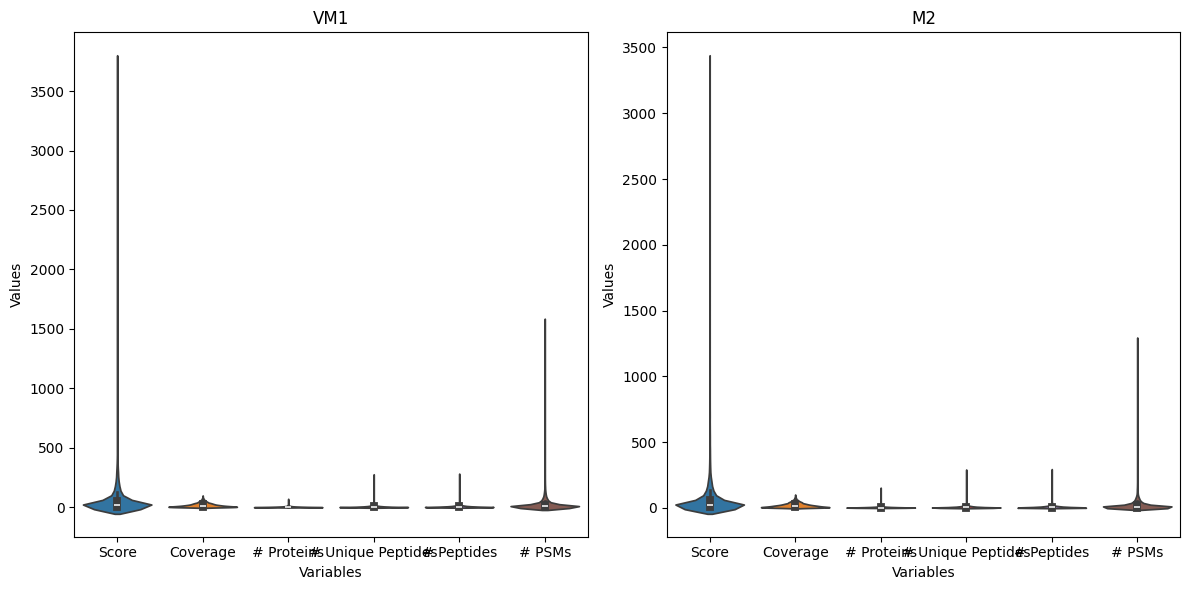

In [5]:
# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot violin plot for M1
sns.violinplot(data=dataM1.select_dtypes(include=[np.number]), ax=axs[0])
axs[0].set_title("VM1")
axs[0].set_xlabel("Variables")
axs[0].set_ylabel("Values")

# Plot violin plot for M2
sns.violinplot(data=dataM2.select_dtypes(include=[np.number]), ax=axs[1])
axs[1].set_title("M2")
axs[1].set_xlabel("Variables")
axs[1].set_ylabel("Values")

plt.tight_layout()
plt.show()

In [6]:
# Describe the data
print("M1")
print(dataM1.describe())

print("M2")
print(dataM2.describe())

M1
             Score     Coverage   # Proteins  # Unique Peptides   # Peptides  \
count  6187.000000  6187.000000  6187.000000        6187.000000  6187.000000   
mean     60.209782    19.106992     4.549378           6.041215     6.804105   
std     153.061528    16.815820     4.295120           8.126371     9.034068   
min       0.000000     0.070000     1.000000           0.000000     1.000000   
25%       5.102419     6.105000     2.000000           2.000000     2.000000   
50%      17.022330    13.820000     3.000000           4.000000     4.000000   
75%      55.612183    27.710000     6.000000           8.000000     9.000000   
max    3747.075588    94.740000    71.000000         276.000000   281.000000   

            # PSMs  
count  6187.000000  
mean     25.541620  
std      63.851041  
min       1.000000  
25%       2.000000  
50%       8.000000  
75%      24.000000  
max    1564.000000  
M2
             Score     Coverage   # Proteins  # Unique Peptides   # Peptides  \
coun

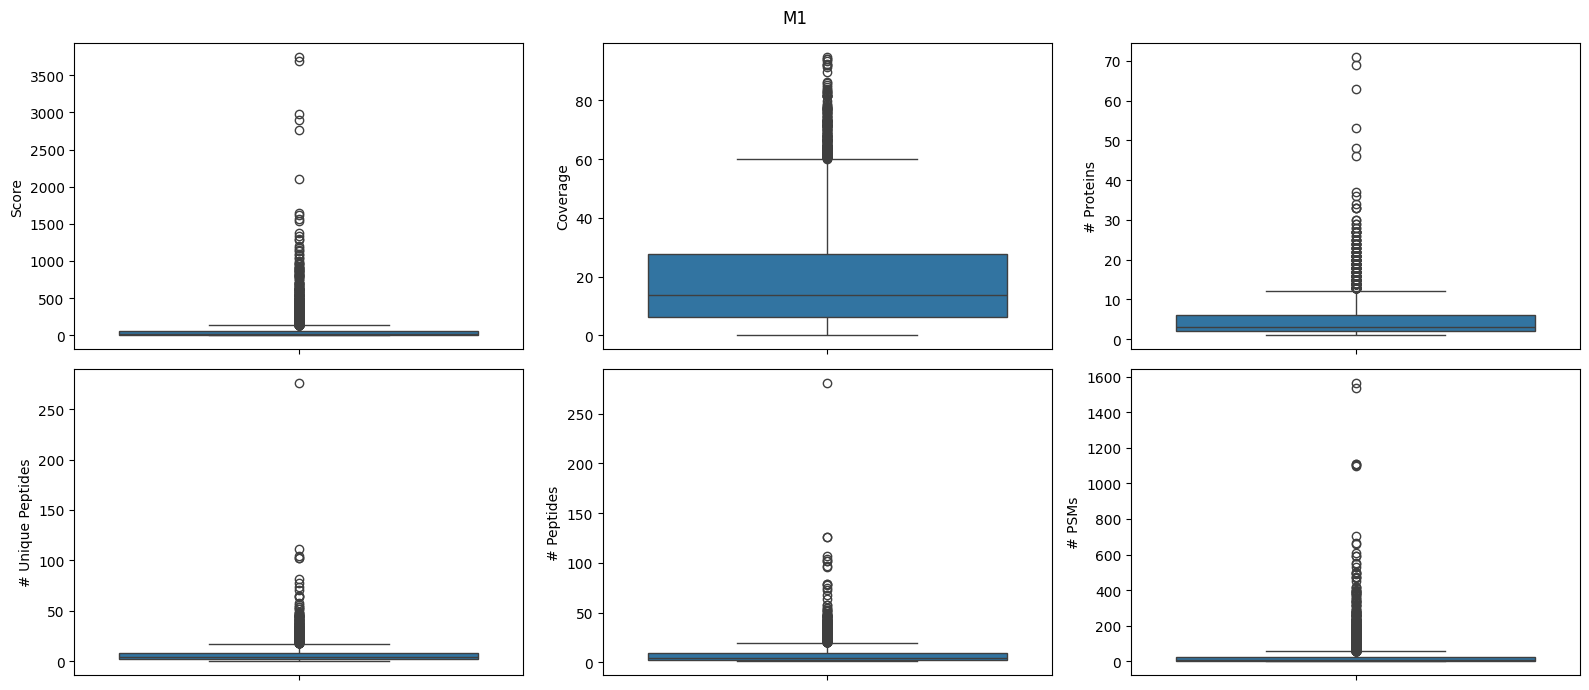

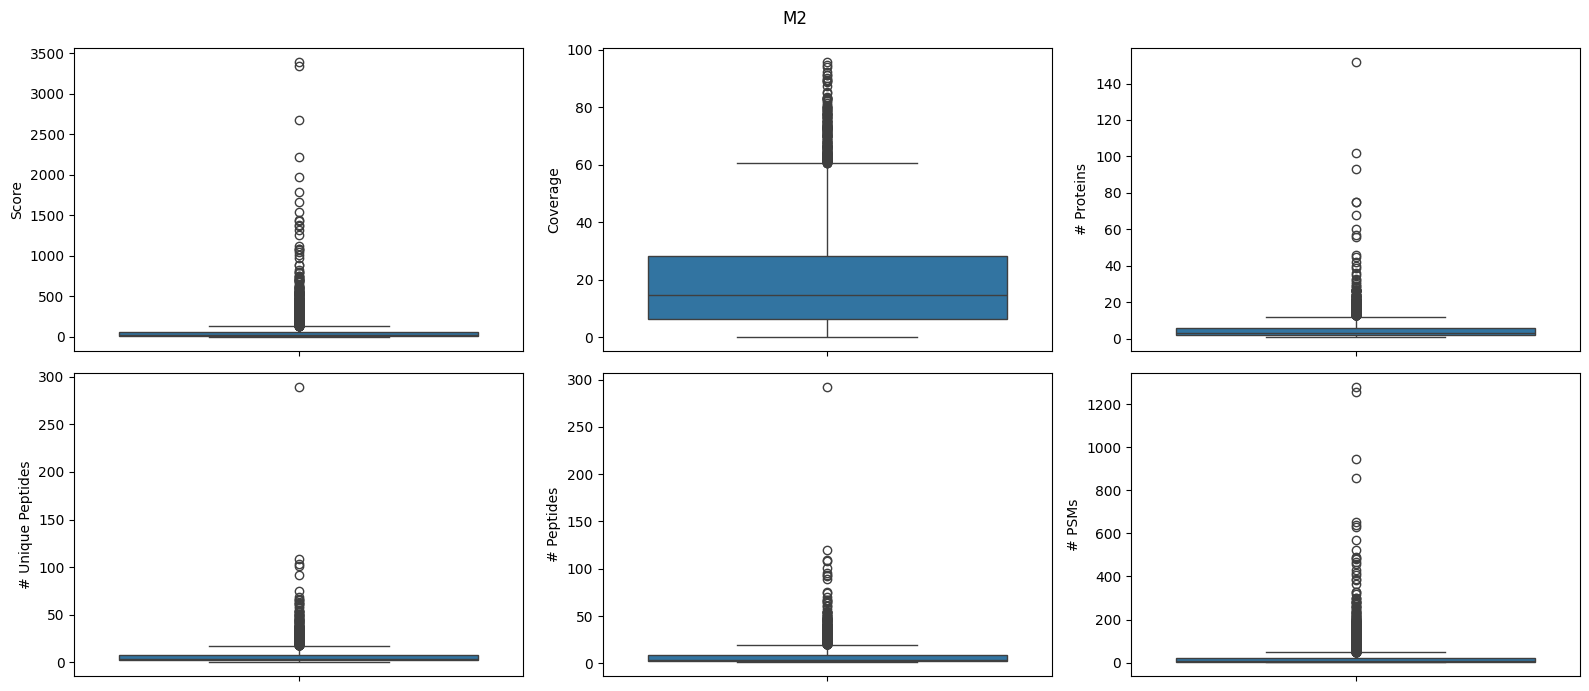

In [7]:

# M1
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(16, 7)
fig.suptitle('M1')
sns.boxplot(y=dataM1["Score"], ax=axs[0, 0])
sns.boxplot(y=dataM1["Coverage"], ax=axs[0, 1])
sns.boxplot(y=dataM1["# Proteins"], ax=axs[0, 2])
sns.boxplot(y=dataM1["# Unique Peptides"], ax=axs[1, 0])
sns.boxplot(y=dataM1["# Peptides"], ax=axs[1, 1])
sns.boxplot(y=dataM1["# PSMs"], ax=axs[1, 2])
plt.tight_layout()
plt.show()

# M2
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(16, 7)
fig.suptitle('M2')
sns.boxplot(y=dataM2["Score"], ax=axs[0, 0])
sns.boxplot(y=dataM2["Coverage"], ax=axs[0, 1])
sns.boxplot(y=dataM2["# Proteins"], ax=axs[0, 2])
sns.boxplot(y=dataM2["# Unique Peptides"], ax=axs[1, 0])
sns.boxplot(y=dataM2["# Peptides"], ax=axs[1, 1])
sns.boxplot(y=dataM2["# PSMs"], ax=axs[1, 2])
plt.tight_layout()
plt.show()

In [8]:
PEPTIDE_THRESHOLD = 2

# Print the number of proteins with less than PEPTIDE_THRESHOLD peptides
print(f"Number of proteins with less than {PEPTIDE_THRESHOLD} peptides in M1: {dataM1[dataM1['# Peptides'] < PEPTIDE_THRESHOLD].shape[0]}")
print(f"Number of proteins with less than {PEPTIDE_THRESHOLD} peptides in M2: {dataM2[dataM2['# Peptides'] < PEPTIDE_THRESHOLD].shape[0]}")

# Filter out data with less than 2 peptides
dataM1 = dataM1[dataM1["# Peptides"] >= PEPTIDE_THRESHOLD]
dataM2 = dataM2[dataM2["# Peptides"] >= PEPTIDE_THRESHOLD]

Number of proteins with less than 2 peptides in M1: 1292
Number of proteins with less than 2 peptides in M2: 1374


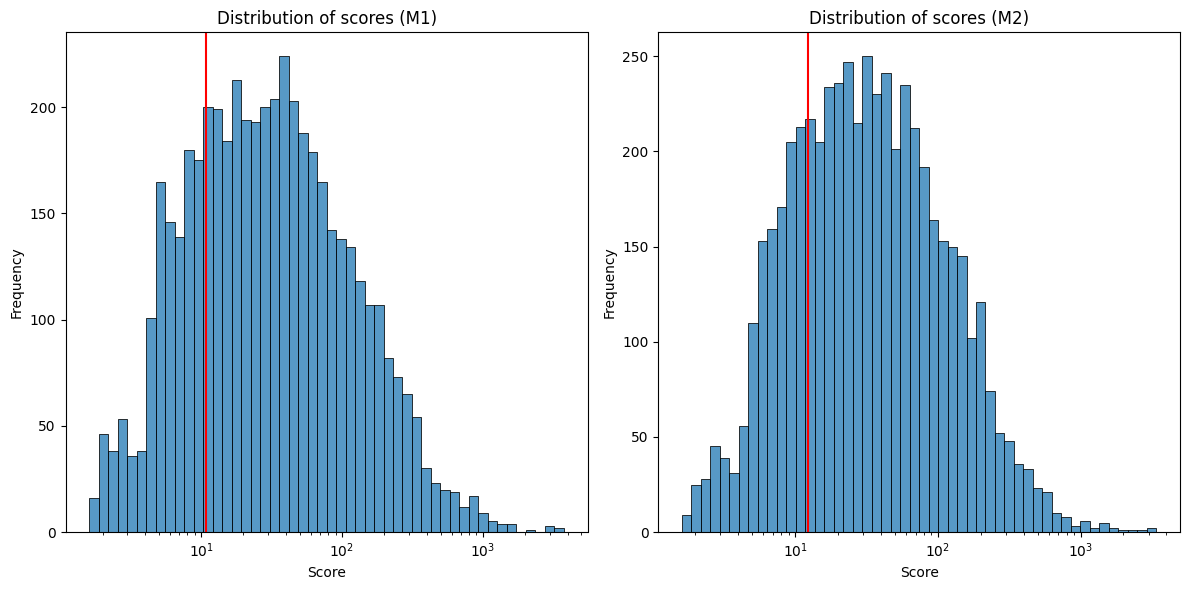

%Proteins (Score >= 10.75174981355665) (M1):  74.99%
%Proteins (Score >= 12.399958431720725) (M2):  75.00%


In [9]:
# Bottom limit for SCORE in percentage
SCORE_PCT_THRESHOLD = 25

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot dataM1
sns.histplot(dataM1['Score'], bins=50, log_scale=True, ax=axs[0])
m1_score_threshold = np.percentile(dataM1['Score'], SCORE_PCT_THRESHOLD)
axs[0].set_title("Distribution of scores (M1)")
axs[0].set_xlabel("Score")
axs[0].set_ylabel("Frequency")
axs[0].axvline(m1_score_threshold, color='red')

# Plot dataM2
sns.histplot(dataM2['Score'], bins=50, log_scale=True, ax=axs[1])
m2_score_threshold = np.percentile(dataM2['Score'], SCORE_PCT_THRESHOLD)
axs[1].set_title("Distribution of scores (M2)")
axs[1].set_xlabel("Score")
axs[1].set_ylabel("Frequency")
axs[1].axvline(m2_score_threshold, color='red')

plt.tight_layout()
plt.show()


# Percentage of proteins with a score higher than the threshold
n_proteins = dataM1.shape[0]
n_proteins_above_threshold = dataM1[dataM1['Score'] >= m1_score_threshold].shape[0]
print(f"%Proteins (Score >= {m1_score_threshold}) (M1):  {n_proteins_above_threshold/n_proteins*100:.2f}%")

n_proteins = dataM2.shape[0]
n_proteins_above_threshold = dataM2[dataM2['Score'] >= m2_score_threshold].shape[0]
print(f"%Proteins (Score >= {m2_score_threshold}) (M2):  {n_proteins_above_threshold/n_proteins*100:.2f}%")


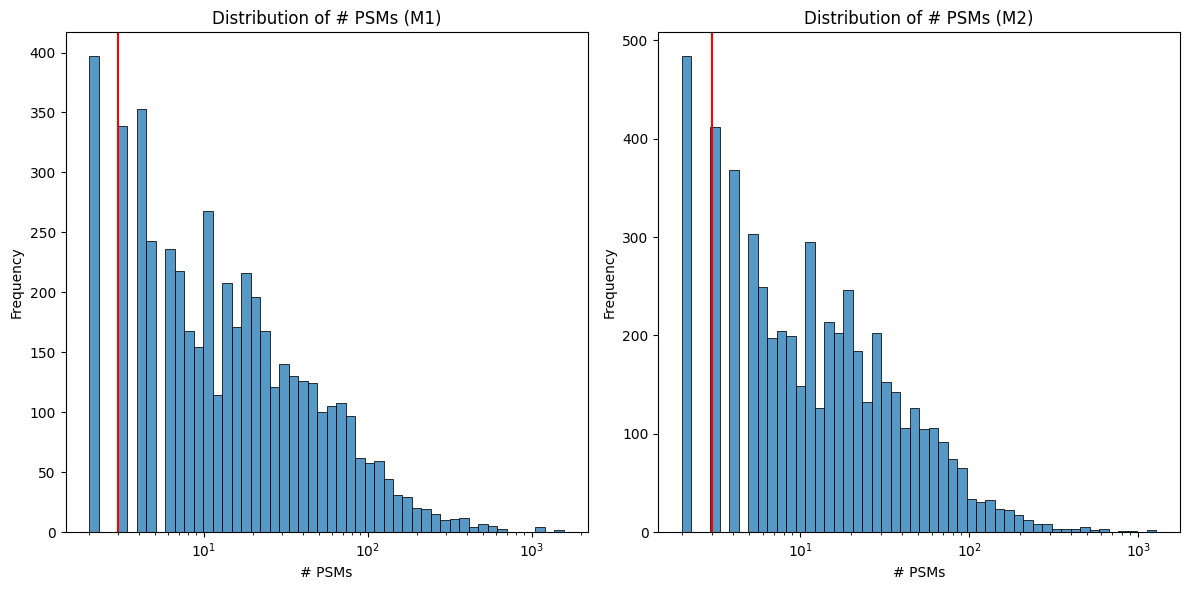

%Proteins (# PSMs >= 3.0) (M1):  91.89%
%Proteins (# PSMs >= 3.0) (M2):  90.95%


In [10]:
# Bottom limit for # PSMs in percentage
PSM_PCT_THRESHOLD = 10

# Plot the distribution of scores and # PSMs for both dataM1 and dataM2
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot dataM1 # PSMs
sns.histplot(dataM1['# PSMs'], bins=50, log_scale=True, ax=axs[0])
m1_psm_threshold = np.percentile(dataM1['# PSMs'], PSM_PCT_THRESHOLD)
axs[0].set_title("Distribution of # PSMs (M1)")
axs[0].set_xlabel("# PSMs")
axs[0].set_ylabel("Frequency")
axs[0].axvline(m1_psm_threshold, color='red')

# Plot dataM2 # PSMs
sns.histplot(dataM2['# PSMs'], bins=50, log_scale=True, ax=axs[1])
m2_psm_threshold = np.percentile(dataM2['# PSMs'], PSM_PCT_THRESHOLD)
axs[1].set_title("Distribution of # PSMs (M2)")
axs[1].set_xlabel("# PSMs")
axs[1].set_ylabel("Frequency")
axs[1].axvline(m2_psm_threshold, color='red')

plt.tight_layout()
plt.show()


# Percentage of proteins with a score higher than the threshold for both dataM1 and dataM2
n_proteins = dataM1.shape[0]
n_proteins_above_threshold = dataM1[dataM1['# PSMs'] >= m1_psm_threshold].shape[0]
print(f"%Proteins (# PSMs >= {m1_psm_threshold}) (M1):  {n_proteins_above_threshold/n_proteins*100:.2f}%")

n_proteins = dataM2.shape[0]
n_proteins_above_threshold = dataM2[dataM2['# PSMs'] >= m2_psm_threshold].shape[0]
print(f"%Proteins (# PSMs >= {m2_psm_threshold}) (M2):  {n_proteins_above_threshold/n_proteins*100:.2f}%")




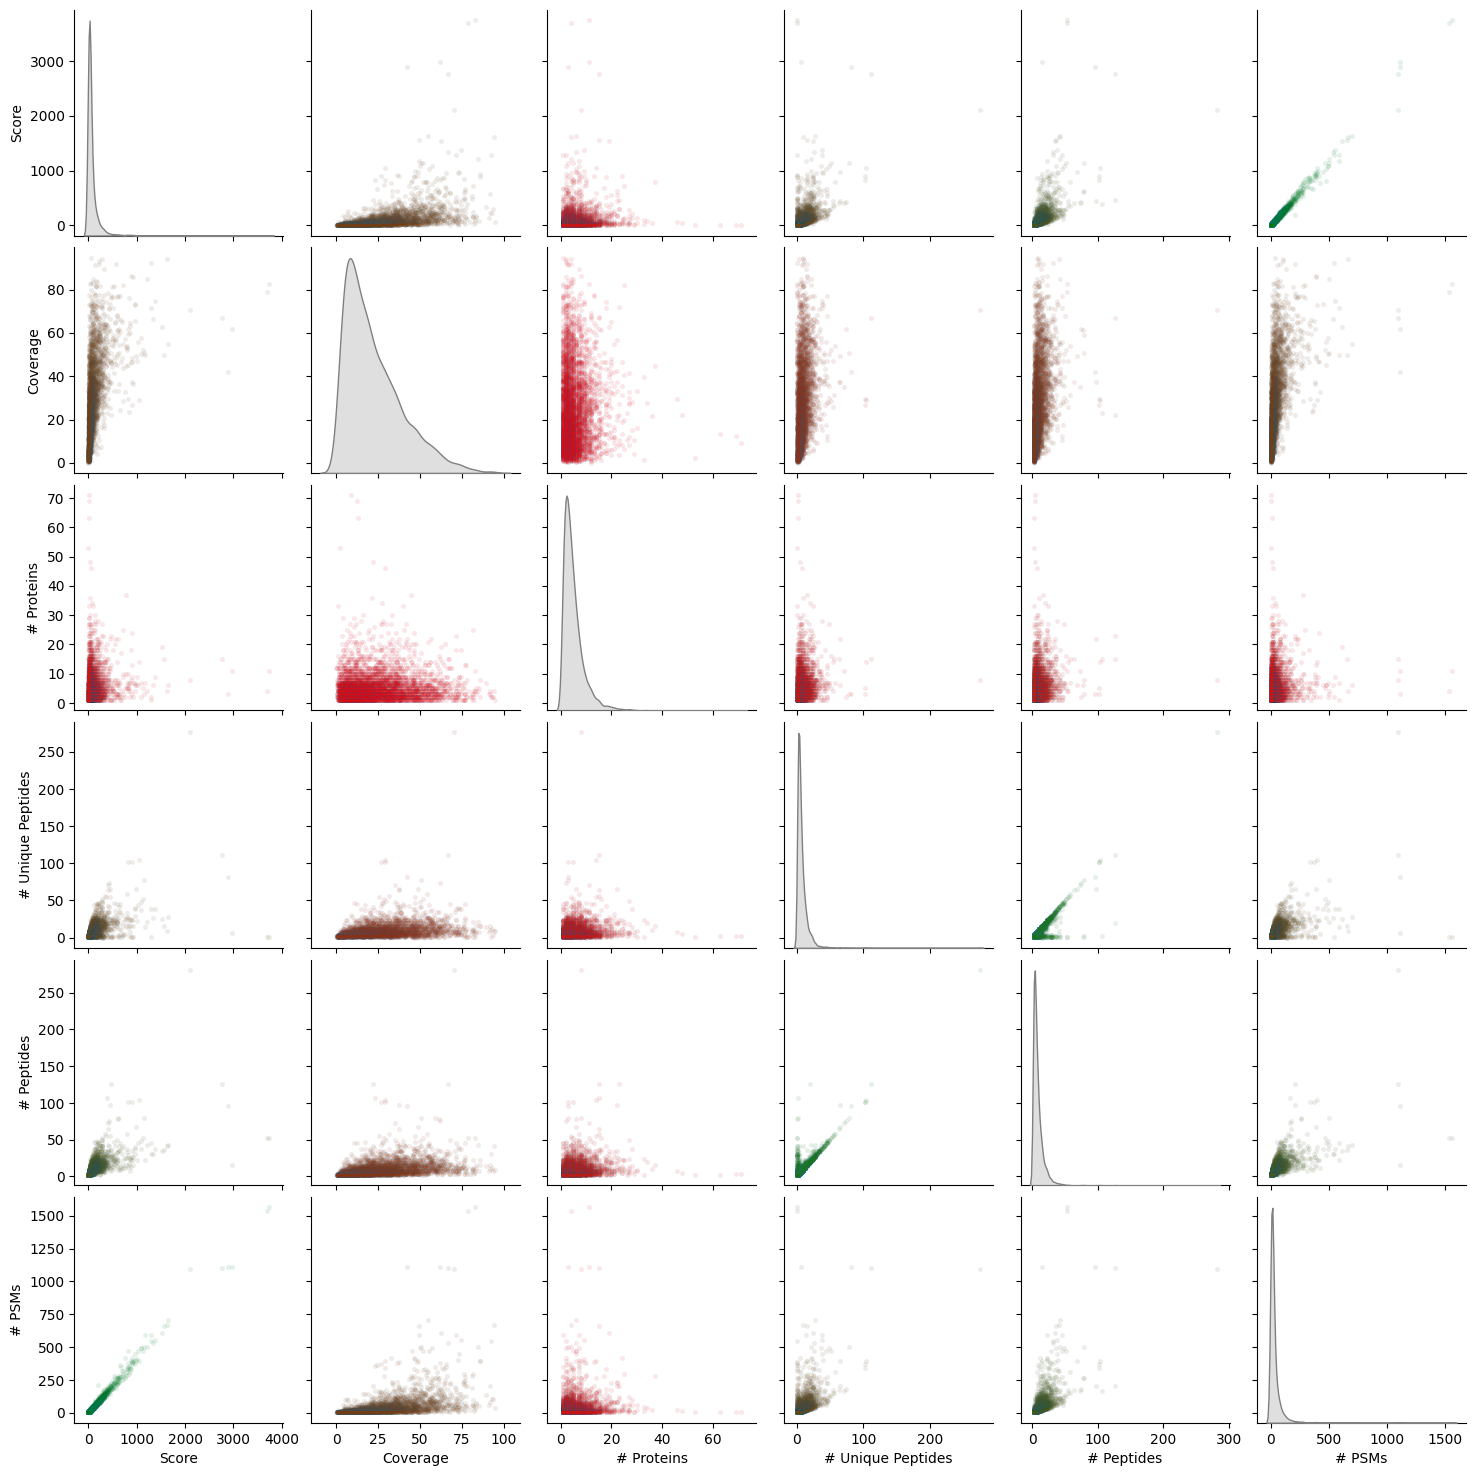

In [11]:

# Example dataset (replace with your data)
data = dataM1.drop(columns=['Description'])

# Compute pairwise correlations
correlations = data.corr().abs()  # Absolute correlation to avoid negative values

# Create a custom gradient from red to green
cmap = LinearSegmentedColormap.from_list("red_green", ["red", "green"])

# Function to get color based on correlation value
def get_color(value, cmap):
    norm_value = (value - correlations.min().min()) / (correlations.max().max() - correlations.min().min())
    return cmap(norm_value)

# do the same, but now using grey color for the diagonal
g = sns.pairplot(data, diag_kind='kde', plot_kws={'s': 10, 'alpha':0.1, 'edgecolor': None}, diag_kws={'color':'grey'})  # 's' controls dot size

# Loop through the axes to color each scatter plot
for i, j in zip(*np.triu_indices_from(correlations, 1)):
    ax = g.axes[i, j]
    corr_value = correlations.iloc[i, j]
    color = get_color(corr_value, cmap)
    
    # Apply the color gradient to all scatter plot
    ax.collections[0].set_facecolor(color)
    ax = g.axes[j, i]
    ax.collections[0].set_facecolor(color)


plt.show()




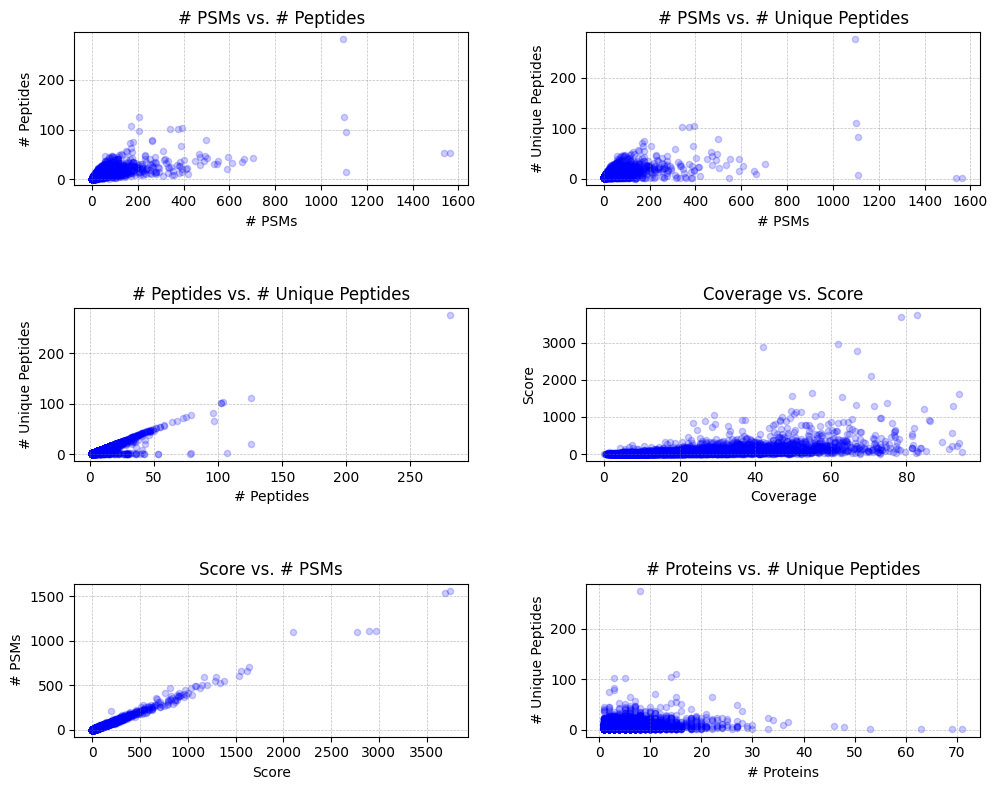

In [12]:


# Define pairs of features to plot
features_to_plot = [
    ('# PSMs', '# Peptides'),
    ('# PSMs', '# Unique Peptides'),
    ('# Peptides', '# Unique Peptides'),
    ('Coverage', 'Score'),
    ('Score', '# PSMs'), 
    ('# Proteins', '# Unique Peptides')
]

# Set grid dimensions (adjust as needed)
rows, cols = 2, 2  # Create a 2x2 grid
rows, cols = features_to_plot.__len__() // 2, 2

# Configure plot size and style outside the loop (efficiency)
fig, axes = plt.subplots(rows, cols, figsize=(10, 8))  # Set figure size and create axes grid
point_size = 20
alpha = 0.2
marker = 'o'
color = 'blue'
grid_params = {'linestyle': '--', 'linewidth': 0.5, 'color': 'gray', 'which': 'both', 'alpha': 0.5}



# Loop through features and create plots
for i in range(rows):
    for j in range(cols):
        x_feature, y_feature = features_to_plot[i * cols + j]  # Access feature pair

        # Create the scatter plot on the current axis
        axes[i, j].scatter(dataM1[x_feature], dataM1[y_feature], s=point_size, alpha=alpha, marker=marker, c=color)

        # Set axis labels and title
        axes[i, j].set_xlabel(x_feature, fontsize=10)
        axes[i, j].set_ylabel(y_feature, fontsize=10)
        axes[i, j].set_title(f'{x_feature} vs. {y_feature}', fontsize=12)

        # Add grid lines
        axes[i, j].grid(**grid_params)

# Adjust spacing and display the plot
plt.tight_layout()
plt.subplots_adjust(hspace=0.8, wspace=0.3)
plt.show()

### Consider only those proteins with **Score** above the Threshold 

In [13]:
dataM1 = dataM1[dataM1['Score'] >= m1_score_threshold]
dataM2 = dataM2[dataM2['Score'] >= m2_score_threshold]

### List the 100 most present proteins in both M1 and M2  *(do not work for identyfing the cell type)*
As "present" I consider those that appear more frequent in the spectra (based on PSMs)

In [14]:
TOP_NUMBER = 100

# Take the top proteins based on the PSMs value (sorted in descending order)
topM1 = dataM1.sort_values(by='# PSMs', ascending=False).head(TOP_NUMBER)
topM2 = dataM2.sort_values(by='# PSMs', ascending=False).head(TOP_NUMBER)


Number of common proteins: 83


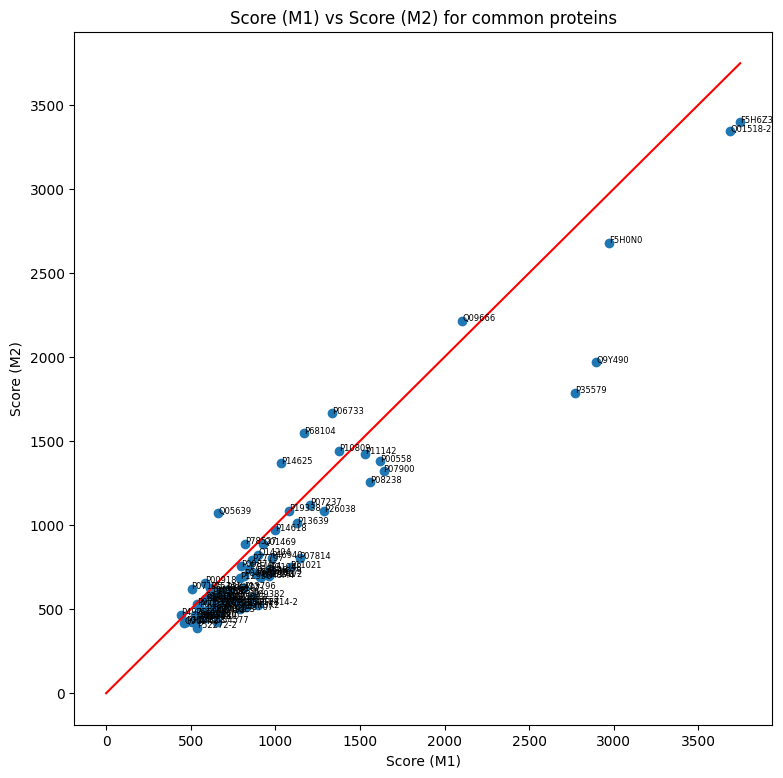

In [15]:
plt.figure(figsize=(9, 9))

# Filter the proteins present in both topM1 and topM2
common_top_proteins = topM1.index.intersection(topM2.index)
print(f"Number of common proteins: {len(common_top_proteins)}")

# Create a mask to filter the common proteins
mask_common = dataM1.index.isin(common_top_proteins)

# plot
plt.scatter(topM1.loc[common_top_proteins]['Score'], topM2.loc[common_top_proteins]['Score'])
plt.xlabel('Score (M1)')
plt.ylabel('Score (M2)')
plt.title('Score (M1) vs Score (M2) for common proteins')
# Add the names of the proteins in small font
for protein in common_top_proteins:
    # add a separation between the dot and the text
    separation = 0.1
    plt.text(topM1.loc[protein]['Score']+separation, topM2.loc[protein]['Score'], protein, fontsize=6)

# Diagonal line
max_value = max(topM1['Score'].max(), topM2['Score'].max())
plt.plot([0, max_value], [0, max_value], color='red')

plt.show()




In [16]:
# Print a table with the first 10 proteins of common_top_proteins. The table must contain the Accession, Description, ScoreM1, ScoreM2, #PSMs M1, #PSMs M2, #Peptides M1, #Peptides M2, #Unique Peptides M1, #Unique Peptides M2, Coverage M1, Coverage M2
print("Table with the first 10 proteins of common_top_proteins")

# Create a table with the first 10 proteins of common_top_proteins
table = pd.DataFrame(index=common_top_proteins[:10])
table['Description'] = dataM1.loc[common_top_proteins[:10]]['Description']
table['Score M1'] = dataM1.loc[common_top_proteins[:10]]['Score']
table['Score M2'] = dataM2.loc[common_top_proteins[:10]]['Score']
table['# PSMs M1'] = dataM1.loc[common_top_proteins[:10]]['# PSMs']
table['# PSMs M2'] = dataM2.loc[common_top_proteins[:10]]['# PSMs']
table['# Peptides M1'] = dataM1.loc[common_top_proteins[:10]]['# Peptides']
table['# Peptides M2'] = dataM2.loc[common_top_proteins[:10]]['# Peptides']
table['# Unique Peptides M1'] = dataM1.loc[common_top_proteins[:10]]['# Unique Peptides']
table['# Unique Peptides M2'] = dataM2.loc[common_top_proteins[:10]]['# Unique Peptides']
table['Coverage M1'] = dataM1.loc[common_top_proteins[:10]]['Coverage']
table['Coverage M2'] = dataM2.loc[common_top_proteins[:10]]['Coverage']

print(table)



Table with the first 10 proteins of common_top_proteins
                                                 Description     Score M1  \
Accession                                                                   
F5H6Z3     Adenylyl cyclase-associated protein OS=Homo sa...  3747.075588   
Q01518-2   Isoform 2 of Adenylyl cyclase-associated prote...  3688.159273   
Q9Y490     Talin-1 OS=Homo sapiens GN=TLN1 PE=1 SV=3 - [T...  2894.871309   
F5H0N0     Actin, gamma 1 OS=Homo sapiens GN=ACTG1 PE=3 S...  2974.059553   
P35579     Myosin-9 OS=Homo sapiens GN=MYH9 PE=1 SV=4 - [...  2768.794294   
Q09666     Neuroblast differentiation-associated protein ...  2106.018609   
P07900     Heat shock protein HSP 90-alpha OS=Homo sapien...  1639.611819   
P00558     Phosphoglycerate kinase 1 OS=Homo sapiens GN=P...  1618.222831   
P08238     Heat shock protein HSP 90-beta OS=Homo sapiens...  1561.624144   
P11142     Heat shock cognate 71 kDa protein OS=Homo sapi...  1532.034057   

              Score

### Differential Expression Analysis

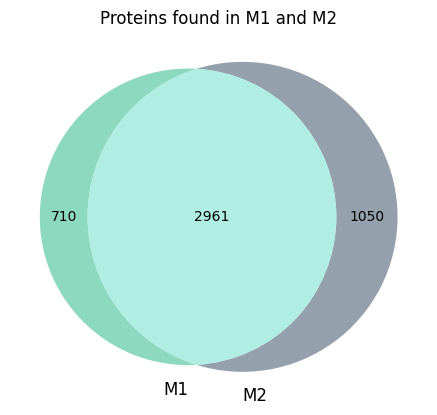

In [17]:
# Get the number of proteins in each dataset
n_proteins_M1 = len(dataM1)
n_proteins_M2 = len(dataM2)

# Get the number of proteins in common
common_proteins = dataM1.index.intersection(dataM2.index)
n_common_proteins = len(common_proteins)

# Create the Venn diagram plot
c = venn2(subsets=(n_proteins_M1 - n_common_proteins, n_proteins_M2 - n_common_proteins, n_common_proteins),
    set_labels=('M1', 'M2'), set_colors=('mediumaquamarine', 'slategrey'), alpha=0.75)

# Add a title to the plot
plt.title('Proteins found in M1 and M2')

# Display the plot
plt.show()




In [18]:

# Check the number of NaN values in dataM1 and dataM2
print("Number of NaN values in dataM1")
print(dataM1.isnull().sum())
print("Number of NaN values in dataM2")
print(dataM2.isnull().sum())

# Create a copy by mergin dataM1 and dataM2 keeping the proteins present in only one of the datasets
merged_data = pd.merge(dataM1, dataM2, how='outer', on='Accession', suffixes=('_M1', '_M2'))
merged_data_original = merged_data.copy()
print(merged_data.isnull().sum())

merged_data['Description_M2'] = merged_data['Description_M2'].fillna('N/A')
merged_data['Description_M1'] = merged_data['Description_M1'].fillna('N/A')

# Replace missing values (NaN) with a very small value
merged_data.fillna(1e-1000, inplace=True)
print(merged_data.isnull().sum())

# Log fold change with the adjusted value
merged_data['Log2FC'] = np.log2(merged_data['# PSMs_M2'] + 1) - np.log2(merged_data['# PSMs_M1'] + 1)



Number of NaN values in dataM1
Description          0
Score                0
Coverage             0
# Proteins           0
# Unique Peptides    0
# Peptides           0
# PSMs               0
dtype: int64
Number of NaN values in dataM2
Description          0
Score                0
Coverage             0
# Proteins           0
# Unique Peptides    0
# Peptides           0
# PSMs               0
dtype: int64
Description_M1          1050
Score_M1                1050
Coverage_M1             1050
# Proteins_M1           1050
# Unique Peptides_M1    1050
# Peptides_M1           1050
# PSMs_M1               1050
Description_M2           710
Score_M2                 710
Coverage_M2              710
# Proteins_M2            710
# Unique Peptides_M2     710
# Peptides_M2            710
# PSMs_M2                710
dtype: int64
Description_M1          0
Score_M1                0
Coverage_M1             0
# Proteins_M1           0
# Unique Peptides_M1    0
# Peptides_M1           0
# PSMs_M1      

As we can observe, there is no missing value in the original dataset.

In [19]:
print(f"Number of 'N/A' in Description_M1: {merged_data[merged_data['Description_M1'] == 'N/A'].shape[0]}")
print(f"Number of 'N/A' in Description_M2: {merged_data[merged_data['Description_M2'] == 'N/A'].shape[0]}")

print(f"Number of proteins that are present in both datasets: {merged_data_original[merged_data_original['Description_M1'].notnull() & merged_data_original['Description_M2'].notnull()].shape[0]}")


Number of 'N/A' in Description_M1: 1050
Number of 'N/A' in Description_M2: 710
Number of proteins that are present in both datasets: 2961


In [20]:
# Add a 'class' column to the merged_data. 
merged_data['class'] = "Both"
merged_data.loc[(merged_data['Description_M1'] != 'N/A') & (merged_data['Description_M2'] == 'N/A'), 'class'] = "M1"
merged_data.loc[(merged_data['Description_M1'] == 'N/A') & (merged_data['Description_M2'] != 'N/A'), 'class'] = "M2"
print(merged_data['class'].value_counts())           



class
Both    2961
M2      1050
M1       710
Name: count, dtype: int64


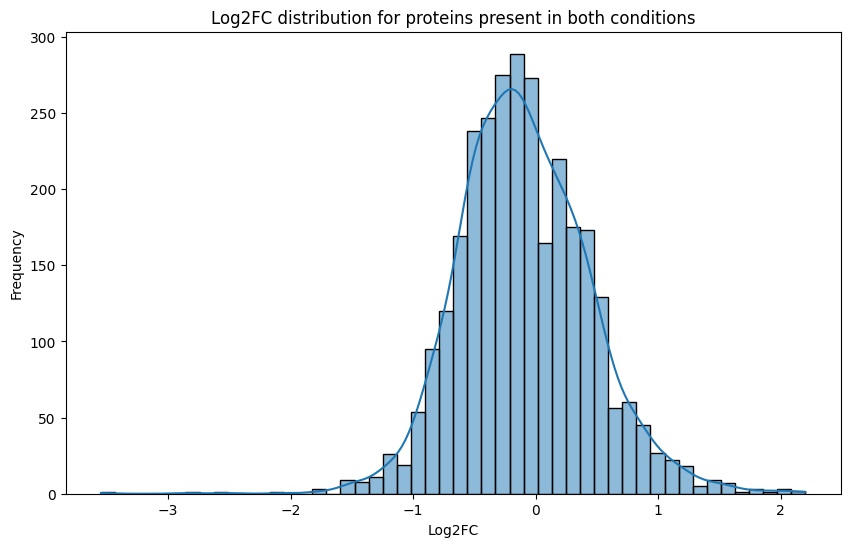

In [21]:
# Distribution of the log fold change for the class "Booth"
plt.figure(figsize=(10, 6))
sns.histplot(merged_data[merged_data['class'] == 'Both']['Log2FC'], bins=50, kde=True)
plt.title("Log2FC distribution for proteins present in both conditions")
plt.xlabel("Log2FC")
plt.ylabel("Frequency")
plt.show()   



Positive values in the 'Log2FC' column represent proteins that are more abundant in condition M2 compared to M1.<br>
Negative Log2FC values indicate proteins that are more abundant in condition M1 compared to M2.<br><br>
*Note that it was computed using #PSMs.*

In [22]:
# Top 10 proteins with the highest log fold change
top10 = merged_data.sort_values(by='Log2FC', ascending=False).head(10)
print(top10[['Description_M1', 'Description_M2', 'Log2FC']])


          Description_M1                                     Description_M2  \
Accession                                                                     
P63267               N/A  Actin, gamma-enteric smooth muscle OS=Homo sap...   
Q15149-4             N/A  Isoform 4 of Plectin OS=Homo sapiens GN=PLEC -...   
F5H1C1               N/A  Actin, alpha, cardiac muscle 1 OS=Homo sapiens...   
P68371               N/A  Tubulin beta-4B chain OS=Homo sapiens GN=TUBB4...   
P40227               N/A  T-complex protein 1 subunit zeta OS=Homo sapie...   
F5GXI3               N/A  Uncharacterized protein OS=Homo sapiens GN=HYO...   
P53396-2             N/A  Isoform 2 of ATP-citrate synthase OS=Homo sapi...   
Q16891-2             N/A  Isoform 2 of Mitochondrial inner membrane prot...   
Q99832               N/A  T-complex protein 1 subunit eta OS=Homo sapien...   
Q14651               N/A  Plastin-1 OS=Homo sapiens GN=PLS1 PE=1 SV=2 - ...   

             Log2FC  
Accession            
P63267 

In [23]:
# describe merged_data
print(merged_data.describe())

          Score_M1  Coverage_M1  # Proteins_M1  # Unique Peptides_M1  \
count  4721.000000  4721.000000    4721.000000           4721.000000   
mean     76.488189    20.825878       4.065664              6.993222   
std     172.009095    18.809616       4.511371              9.128390   
min       0.000000     0.000000       0.000000              0.000000   
25%      11.917271     5.280000       1.000000              1.000000   
50%      29.947550    17.330000       3.000000              5.000000   
75%      76.925568    32.060000       6.000000              9.000000   
max    3747.075588    94.740000      48.000000            276.000000   

       # Peptides_M1    # PSMs_M1     Score_M2  Coverage_M2  # Proteins_M2  \
count    4721.000000  4721.000000  4721.000000  4721.000000    4721.000000   
mean        7.951493    32.153146    77.575520    23.174899       4.460919   
std        10.103090    71.830011   150.533736    18.455305       4.611956   
min         0.000000     0.000000     0

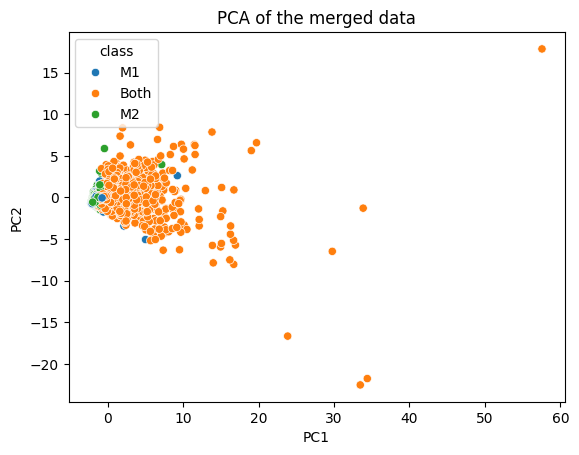

In [24]:
# Create the PCA object
pca = PCA(n_components=2)

# Create the StandardScaler object
scaler = StandardScaler()

# Fit the scaler
scaler.fit(merged_data.drop(columns=['Description_M1', 'Description_M2', 'Log2FC', 'class']))

# Transform the data
X = scaler.transform(merged_data.drop(columns=['Description_M1', 'Description_M2', 'Log2FC', 'class']))

# Fit the PCA
pca.fit(X)

# Transform the data
X_pca = pca.transform(X)

# Create a dataframe with the PCA values
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Add the class column
pca_df['class'] = merged_data['class'].values

# Plot the PCA
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='class')
plt.title('PCA of the merged data')
plt.show()


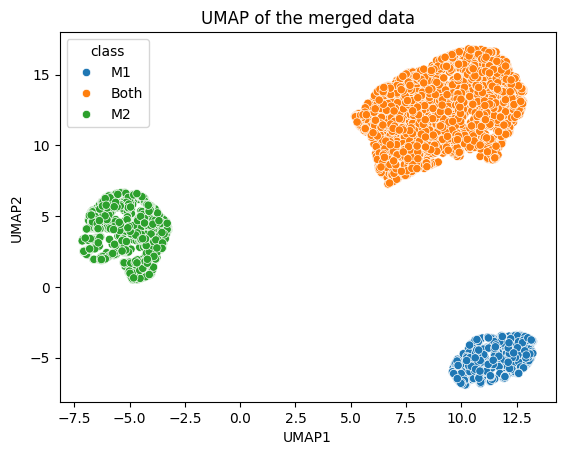

In [25]:
# Create the UMAP object
umap_obj = umap.UMAP()

# Fit the UMAP
umap_obj.fit(X)

# Transform the data
X_umap = umap_obj.transform(X)

# Create a dataframe with the UMAP values
umap_df = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])

# Add the class column
umap_df['class'] = merged_data['class'].values

# Plot the UMAP
sns.scatterplot(data=umap_df, x='UMAP1', y='UMAP2', hue='class')
plt.title('UMAP of the merged data')
plt.show()


In [26]:
# Initialize a list to store p-values
p_values = []

# Loop through each protein to calculate the p-value using Fisher's exact test
for index, row in merged_data.iterrows():
    # Create a 2x2 contingency table based on presence/absence in M1 and M2
    # Assumes 1 for present, 0 for absent
    if row['class'] == 'M1' or row['class'] == 'M2':
        present_m1 = 1 if row['class'] == 'M1' else 0
        present_m2 = 1 if row['class'] == 'M2' else 0

        # Contingency table format: [[present in M1, absent in M1], [present in M2, absent in M2]]
        contingency_table = [[present_m1, 1 - present_m1], [present_m2, 1 - present_m2]]
        
        # Perform Fisher's Exact Test
        _, p_val = fisher_exact(contingency_table)
        p_values.append(p_val)
    else:
        # If the protein is present in both or absent in both, assign a default p-value (e.g., 1)
        p_values.append(1.0)

# Add p-values to the dataframe
merged_data['p_value_class'] = p_values

# print unique p-values
print(f"Unique p-values (class): {len(set(p_values))}")



Unique p-values (class): 1


As **all p-values are 1**, it means that there is no significant difference between the two groups for any protein.
This make sense considering the chart with the PSM's (M1) vs PSM's (M2) 

---
# DEA
Identify proteins that are significantly upregulated or downregulated between different conditions (M1 vs M2).

In [27]:
data = merged_data.copy()
# drop p_value_class
data = data.drop(columns=['p_value_class'])
print(data.describe())

          Score_M1  Coverage_M1  # Proteins_M1  # Unique Peptides_M1  \
count  4721.000000  4721.000000    4721.000000           4721.000000   
mean     76.488189    20.825878       4.065664              6.993222   
std     172.009095    18.809616       4.511371              9.128390   
min       0.000000     0.000000       0.000000              0.000000   
25%      11.917271     5.280000       1.000000              1.000000   
50%      29.947550    17.330000       3.000000              5.000000   
75%      76.925568    32.060000       6.000000              9.000000   
max    3747.075588    94.740000      48.000000            276.000000   

       # Peptides_M1    # PSMs_M1     Score_M2  Coverage_M2  # Proteins_M2  \
count    4721.000000  4721.000000  4721.000000  4721.000000    4721.000000   
mean        7.951493    32.153146    77.575520    23.174899       4.460919   
std        10.103090    71.830011   150.533736    18.455305       4.611956   
min         0.000000     0.000000     0

In [28]:
# Create a "data" dataframe with the columns 'Accession', '# PSMs_M1' and '# PSMs_M2'
data = merged_data[merged_data['class'] == 'Both'][['# PSMs_M1', '# PSMs_M2']]

# Melt the DataFrame into long format
df_long = data.stack().reset_index()
df_long.columns = ['Protein', 'Condition', 'PSM']

# Extract the condition from the column name
df_long['Condition'] = df_long['Condition'].str.extract(r'# PSMs_(M\d+)')

print(df_long)

       Protein Condition    PSM
0       A0AVT1        M1  105.0
1       A0AVT1        M2  100.0
2     A0FGR8-2        M1   39.0
3     A0FGR8-2        M2   38.0
4       A0MZ66        M1   20.0
...        ...       ...    ...
5917    Q9Y6N5        M2  119.0
5918    Q9Y6W3        M1    6.0
5919    Q9Y6W3        M2   12.0
5920  Q9Y6W5-2        M1   20.0
5921  Q9Y6W5-2        M2   17.0

[5922 rows x 3 columns]


In [29]:
# Convert it to wide format
df_wide = df_long.pivot(index='Protein', columns='Condition', values='PSM')
print(df_wide)

Condition     M1     M2
Protein                
A0AVT1     105.0  100.0
A0FGR8-2    39.0   38.0
A0MZ66      20.0   25.0
A0T124       7.0    9.0
A1A4S6      10.0   14.0
...          ...    ...
Q9Y6I9       7.0   10.0
Q9Y6M1-1    41.0   40.0
Q9Y6N5     197.0  119.0
Q9Y6W3       6.0   12.0
Q9Y6W5-2    20.0   17.0

[2961 rows x 2 columns]


In [30]:
# Assuming your DataFrame is named 'df'
data_matrix = data.values.T  # Transpose to get a matrix-like structure

# Create an AnnData object
adata = ad.AnnData(
    X=data_matrix,
    obs=pd.DataFrame({'Condition': ['M1', 'M2']}),
    var=pd.DataFrame(index=data.index)
)

/Users/gerardfont/Documents/Gerard/Master_BiomedicalDataScience/00_Master_THESIS/code/pyMSpro/venv/lib/python3.9/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [31]:
adata.obs['Condition'] = adata.obs['Condition'].astype('category')
print(adata.obs['Condition'].dtype)
print(adata.obs['Condition'])

# DEA with scanpy
sc.tl.rank_genes_groups(adata, groupby='Condition', method='wilcoxon')

# Draw a Volcano plot
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

# Display the plot
plt.show()






category
0    M1
1    M2
Name: Condition, dtype: category
Categories (2, object): ['M1', 'M2']


ValueError: Could not calculate statistics for groups M2, M1 since they only contain one sample.

In [ ]:
# Compute the log fold change and p-value for each protein in a new DataFrame
df_lfc = pd.DataFrame()
df_lfc['Protein'] = df_long['Protein'].unique()
df_lfc['Log2FC'] = np.log2(df_long[df_long['Condition'] == 'M2']['PSM'].values + 1) - np.log2(df_long[df_long['Condition'] == 'M1']['PSM'].values + 1)
print(df_lfc.head(20))


     Protein    Log2FC
0     A0AVT1 -0.069709
1   A0FGR8-2 -0.036526
2     A0MZ66  0.308122
3     A0T124  0.321928
4     A1A4S6  0.447459
5     A1L0T0 -0.263034
6     A1X283 -0.263034
7     A2A2W8  0.061401
8     A2RRP1  0.321928
9     A4D1E9 -0.222392
10    A5A3E0  0.199309
11    A6NC86  0.125531
12    A6NED0  0.415037
13    A6NF48 -0.643856
14    A6NFA8  0.000000
15    A6NG79 -0.415037
16    A6NHR9 -0.302563
17    A6NJA2  0.381090
18    A6NJZ9  0.807355
19    A6NKA3 -0.584963


In [ ]:
# Convert the dataframe into a wide format
df_wide = df_long.pivot(index='Protein', columns='Condition', values='PSM')
df_wide.columns = ['M1', 'M2']
print(df_wide)


             M1     M2
Protein               
A0AVT1    105.0  100.0
A0FGR8-2   39.0   38.0
A0MZ66     20.0   25.0
A0T124      7.0    9.0
A1A4S6     10.0   14.0
...         ...    ...
Q9Y6I9      7.0   10.0
Q9Y6M1-1   41.0   40.0
Q9Y6N5    197.0  119.0
Q9Y6W3      6.0   12.0
Q9Y6W5-2   20.0   17.0

[2961 rows x 2 columns]


In [ ]:
data = merged_data[merged_data['class'] == 'Both'].copy()
# move the indexes to rows
data = data.reset_index()
# move the indexes to columns


print(data.head())
print("---")
data= data.reset_index()
print(data.head())
print("---")
# Filter out the p-value column
data = data.drop(columns=['p_value_class'])
#data = data.drop(columns=['class'])
data = data.drop(columns=['Description_M1'])
data = data.drop(columns=['Description_M2'])


# If Log2FC is < 0, the protein is downregulated in M2 and set class to "M2"
data.loc[data['Log2FC'] < 0, 'class'] = 2
# If Log2FC is > 0, the protein is upregulated in M2 and set class to "M1"
data.loc[data['Log2FC'] > 0, 'class'] = 1
# Delete rows with Log2FC = 0
data = data[data['Log2FC'] != 0]




# Perform a differential expression analysis with the proteins of data that contantains proteins found under M1 & M2, with the Log2FC already computed
# Create an AnnData object with all the values to the object except the class column. Exclude also the index that contains the Accession
adata = ad.AnnData(data.drop(columns=['Log2FC']).T)
print(adata)
print(adata.obs)


# Reset the index if necessary
if adata.obs.index.name == 'class':
    adata=adata.obs.reset_index(inplace=True)

print(adata)
print(adata.obs)


# Assuming 'adata' is your AnnData object
adata.obs['class'] = adata.obs['class'].astype('category')  # Convert to categorical

sc.pp.normalize_total(adata, target_sum=1e6)
sc.pp.log1p(adata)

sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

sc.tl.rank_genes_groups(adata, 'class', method='wilcoxon')

sc.pl.umap(adata, color='class')
sc.pl.violin(adata, 'gene_name', group='class')

  Accession                                     Description_M1    Score_M1  \
0    A0AVT1  Ubiquitin-like modifier-activating enzyme 6 OS...  264.050569   
1  A0FGR8-2  Isoform 2 of Extended synaptotagmin-2 OS=Homo ...  115.592506   
2    A0JNW5  UHRF1-binding protein 1-like OS=Homo sapiens G...    7.787526   
3    A0MZ66  Shootin-1 OS=Homo sapiens GN=KIAA1598 PE=1 SV=...   45.802690   
4    A0T124  Jumonji domain-containing 1 C splice variant O...   13.434971   

   Coverage_M1  # Proteins_M1  # Unique Peptides_M1  # Peptides_M1  # PSMs_M1  \
0        38.97            6.0                  33.0           34.0      105.0   
1        27.32            8.0                  15.0           15.0       39.0   
2         4.92            4.0                   5.0            6.0        6.0   
3        25.52            8.0                  15.0           15.0       20.0   
4         4.28            3.0                   5.0            6.0        7.0   

                                      Descri

/Users/gerardfont/Documents/Gerard/Master_BiomedicalDataScience/00_Master_THESIS/code/pyMSpro/venv/lib/python3.9/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


KeyError: 'class'

In [ ]:
data = merged_data[merged_data['class'] == 'Both'].copy()

# Filter out the p-value column
data = data.drop(columns=['p_value_class'])
#data = data.drop(columns=['class'])
data = data.drop(columns=['Description_M1'])
data = data.drop(columns=['Description_M2'])


# If Log2FC is < 0, the protein is downregulated in M2 and set class to "M2"
data.loc[data['Log2FC'] < 0, 'class'] = 2
# If Log2FC is > 0, the protein is upregulated in M2 and set class to "M1"
data.loc[data['Log2FC'] > 0, 'class'] = 1
# Delete rows with Log2FC = 0
data = data[data['Log2FC'] != 0]

print(data['class'].value_counts())

# Perform a differential expression analysis with the proteins of data that contantains proteins found under M1 & M2, with the Log2FC already computed
# Create an AnnData object with all the values to the object except the class column. Exclude also the index that contains the Accession
adata = ad.AnnData(data.drop(columns=['class', 'Log2FC']))
# Add the class column to the object
#adata.obs['Accession'] = data.index
# Create an obs called 'class' with the values of the class column with 'M' as prefix
#adata.obs['class'] = 'M' + data['class'].astype(str)
adata.obs['class'] = data['class'].astype(str)


print(adata)
# print the name of the n_vars
print(adata.var_names)



# Perform PCA
#sc.tl.pca(adata)
# Plot the PCA
#sc.pl.pca(adata, color='class')

# Perform UMAP
#sc.pp.neighbors(adata)
#sc.tl.umap(adata)

# Plot the UMAP
#sc.pl.umap(adata, color='class')




# Perform a differential expression analysis
sc.tl.rank_genes_groups(adata, groupby='class', method='wilcoxon')

# Create a dataframe with the results
results = pd.DataFrame(adata.uns['rank_genes_groups']['names'])
results['logfoldchanges'] = pd.DataFrame(adata.uns['rank_genes_groups']['logfoldchanges'])
results['pvals'] = pd.DataFrame(adata.uns['rank_genes_groups']['pvals'])
results['pvals_adj'] = pd.DataFrame(adata.uns['rank_genes_groups']['pvals_adj'])

# Print the results
print(results.head())


# Create a volcano plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results, x='logfoldchanges', y='pvals_adj')
plt.title('Volcano plot')
plt.xlabel('Log2FC')
plt.ylabel('Adjusted p-value')
plt.show()




---
# Functional Enrichement Analysis
Determine the biological functions and pathways that are overrepresented among differentially expressed proteins.<br>
This can provide insights into the broader biological context of the observed changes and identify potential drug targets or biomarkers.

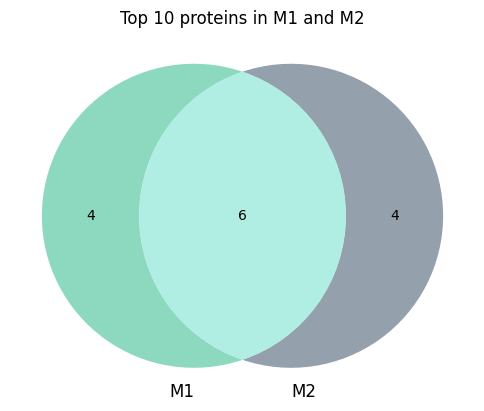

In [ ]:
# Take the 10 most abundant proteins in M1 and M2 and create a Venn diagram
# Get the top 10 proteins in M1 and M2
top10_M1 = dataM1.sort_values(by='# PSMs', ascending=False).head(10).index
top10_M2 = dataM2.sort_values(by='# PSMs', ascending=False).head(10).index

# Create the Venn diagram
plt.figure(figsize=(6, 6))
c = venn2(subsets=(set(top10_M1), set(top10_M2)), set_labels=('M1', 'M2'), set_colors=('mediumaquamarine', 'slategrey'), alpha=0.75)
plt.title('Top 10 proteins in M1 and M2')
plt.show()


In [ ]:
# Get gene names
unipcl = UniprotClient()

gene_names = unipcl.batch_translate_protein_ids(top10_M1.tolist())
top10_M1.index = [gene_names.get(i, i) for i in top10_M1.tolist()]

In [ ]:
sdb = StringDBClient(server_url="https://string-db.org/api", species=9606, score_threshold=400)

------------------------------------------------------------------------------------------------------------------------------------------------------
Gene:  None
Protein:  F5H6Z3
No gene found in Uniprot for protein  None (F5H6Z3) . It might be an obsolete protein.
 
------------------------------------------------------------------------------------------------------------------------------------------------------
Gene:  CAP1
Protein:  Q01518-2
https://string-db.org/cgi/link?to=E938FA518A0B809E



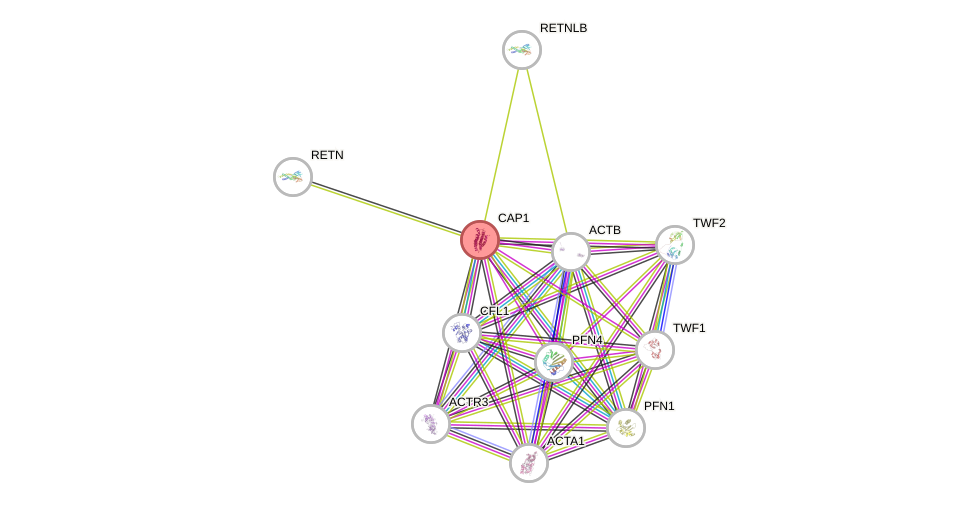

------------------------------------------------------------------------------------------------------------------------------------------------------
Gene:  TLN1
Protein:  Q9Y490
https://string-db.org/cgi/link?to=FE7415E356E59570



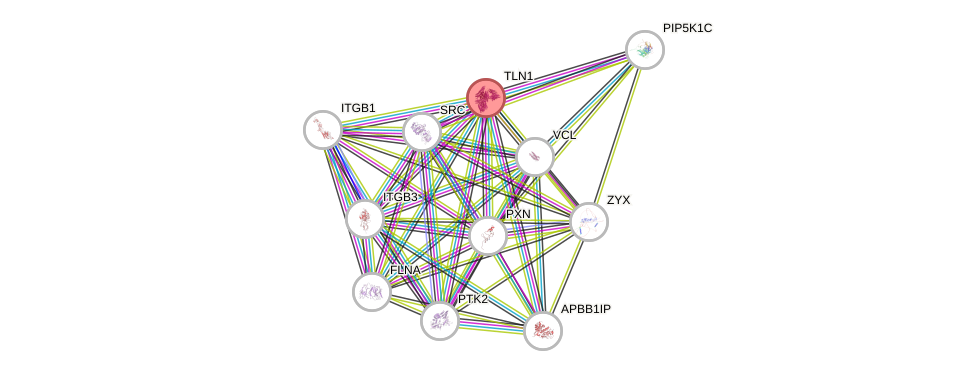

------------------------------------------------------------------------------------------------------------------------------------------------------
Gene:  None
Protein:  F5H0N0
No gene found in Uniprot for protein  None (F5H0N0) . It might be an obsolete protein.
 
------------------------------------------------------------------------------------------------------------------------------------------------------
Gene:  MYH9
Protein:  P35579
https://string-db.org/cgi/link?to=13746039F4024D6F



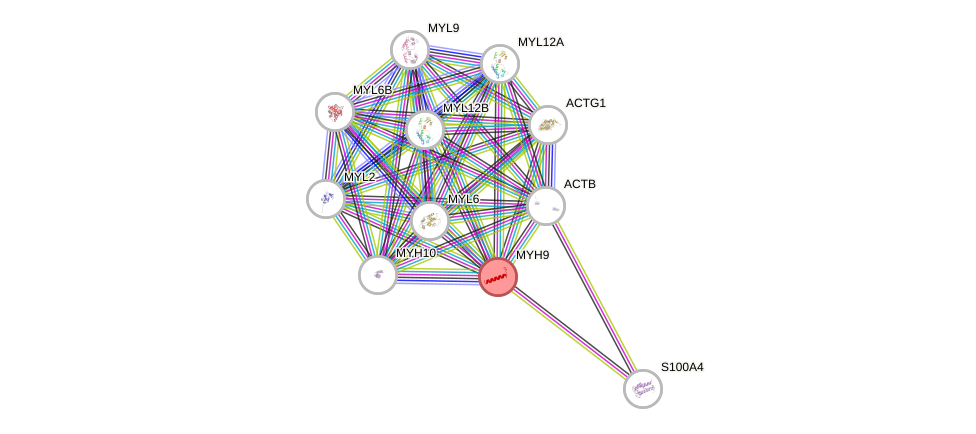

------------------------------------------------------------------------------------------------------------------------------------------------------
Gene:  AHNAK
Protein:  Q09666
https://string-db.org/cgi/link?to=AF1842953F7326AC



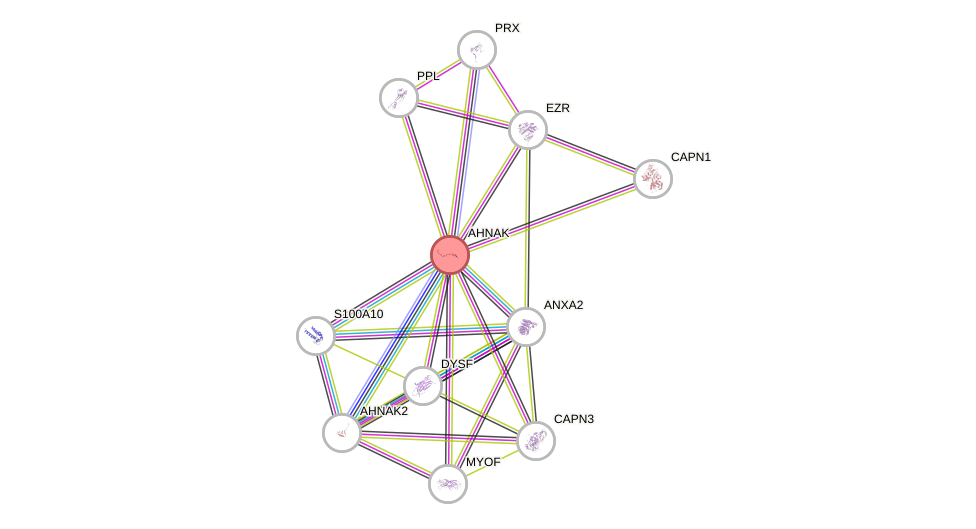

------------------------------------------------------------------------------------------------------------------------------------------------------
Gene:  HSP90AA1
Protein:  P07900
https://string-db.org/cgi/link?to=4CB1588458331579



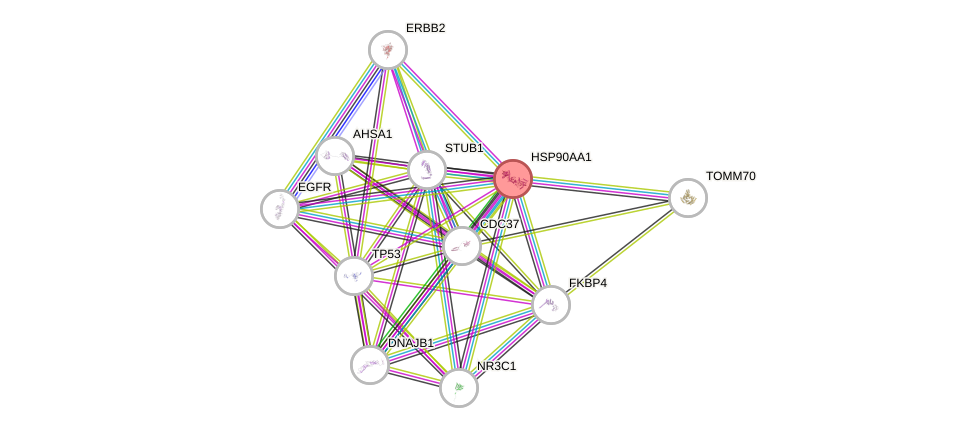

------------------------------------------------------------------------------------------------------------------------------------------------------
Gene:  PGK1
Protein:  P00558
https://string-db.org/cgi/link?to=1F59AA5111D3507D



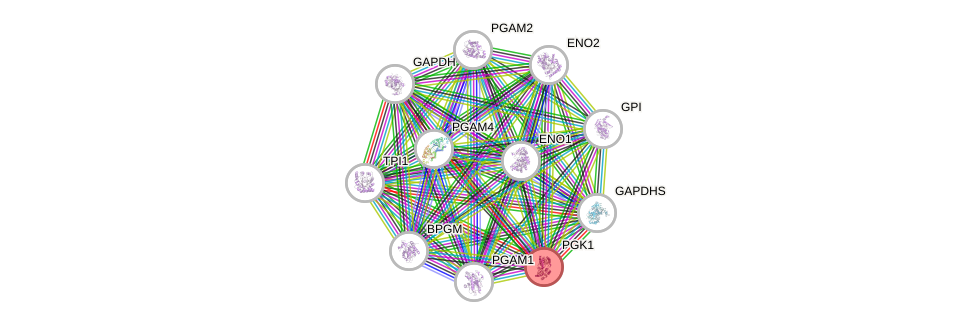

------------------------------------------------------------------------------------------------------------------------------------------------------
Gene:  HSP90AB1
Protein:  P08238
https://string-db.org/cgi/link?to=B1EC23D6FA6133B4



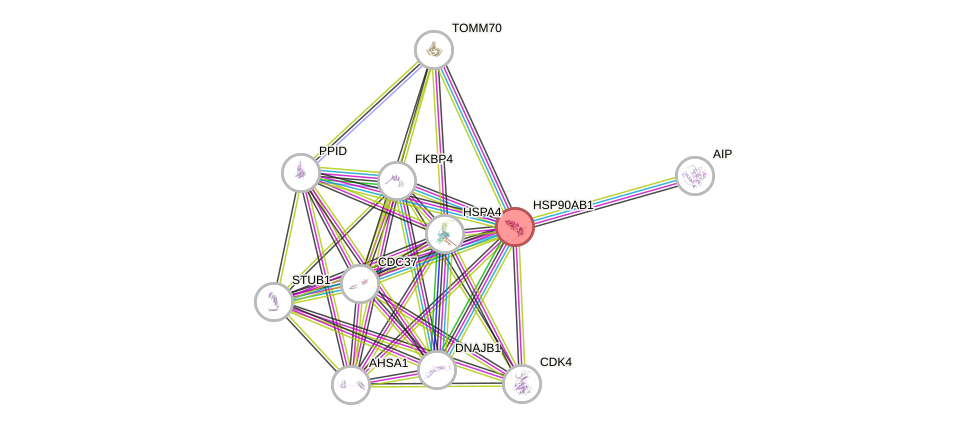

------------------------------------------------------------------------------------------------------------------------------------------------------
Gene:  HSPA8
Protein:  P11142
https://string-db.org/cgi/link?to=04FA44486BACE6ED



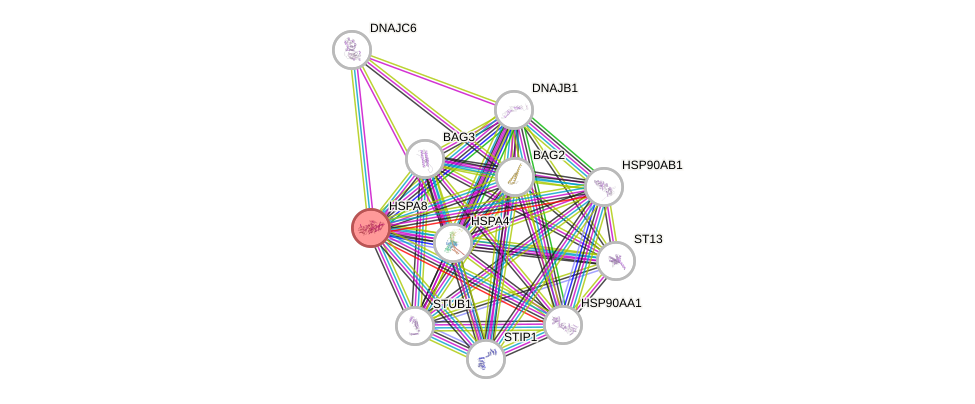

In [ ]:
# Get the network of the top 10 proteins in M1
for protein in top10_M1.index:
    print("-" * 150)

    gene = protein.split(" (")[0]
    print("Gene: ", gene)
    print("Protein: ", protein.split("(")[1].split(")")[0])
    
    if (gene != "None"):
        image_data = sdb.get_network_image(gene, "image")
        page = sdb.get_protein_page(gene, "tsv-no-header")
        print(page)
        display(Image(image_data))
    else:
        print("No gene found in Uniprot for protein ", protein, ". It might be an obsolete protein.")
        print(" ")

In [ ]:
# Functional Enrinchment analysis with GO terms
top10_M1 = dataM1.sort_values(by='# PSMs', ascending=False).head(20).index
top10_M2 = dataM2.sort_values(by='# PSMs', ascending=False).head(20).index



# Get the gene names
gene_names_M1 = unipcl.batch_translate_protein_ids(top10_M1.tolist())
#gene_names_M2 = unipcl.batch_translate_protein_ids(top10_M2.tolist())
print(gene_names_M1)
# prepare a list of gene names. The gene name corresponds to the value before the first parenthesis
gene_names_M1 = [gene.split(" (")[0] for gene in gene_names_M1.values()]
#gene_names_M2 = [gene.split(" (")[0] for gene in gene_names_M2]

print(gene_names_M1)




# Remove the None values
gene_names_M1 = [gene for gene in gene_names_M1 if gene != "None"]



{'F5H6Z3': 'None (F5H6Z3)', 'Q01518-2': 'CAP1 (Q01518-2)', 'Q9Y490': 'TLN1 (Q9Y490)', 'F5H0N0': 'None (F5H0N0)', 'P35579': 'MYH9 (P35579)', 'Q09666': 'AHNAK (Q09666)', 'P07900': 'HSP90AA1 (P07900)', 'P00558': 'PGK1 (P00558)', 'P08238': 'HSP90AB1 (P08238)', 'P11142': 'HSPA8 (P11142)', 'P26038': 'MSN (P26038)', 'P68104': 'EEF1A1 (P68104)', 'P10809': 'HSPD1 (P10809)', 'B4E1H9': 'None (B4E1H9)', 'P06733': 'ENO1 (P06733)', 'P07237': 'P4HB (P07237)', 'P07814': 'EPRS1 (P07814)', 'P19338': 'NCL (P19338)', 'P11021': 'HSPA5 (P11021)', 'P14625': 'HSP90B1 (P14625)'}
['None', 'CAP1', 'TLN1', 'None', 'MYH9', 'AHNAK', 'HSP90AA1', 'PGK1', 'HSP90AB1', 'HSPA8', 'MSN', 'EEF1A1', 'HSPD1', 'None', 'ENO1', 'P4HB', 'EPRS1', 'NCL', 'HSPA5', 'HSP90B1']


2024-10-26 11:54:51,591 [WARNING] Input library not found: KEGG_Pathway. Skip


Exception: No GeneSets are valid !!! Check your gene_sets input.

In [ ]:
print(gene_names_M1)

# Get the GO terms for the top 10 proteins in M1 and M2
# Perform enrichment analysis
enr_res = gp.enrichr(gene_names_M1, gene_sets='KEGG_Pathway', organism='human')

# Visualize the results
gp.dotplot(enr_res)

['CAP1', 'TLN1', 'MYH9', 'AHNAK', 'HSP90AA1', 'PGK1', 'HSP90AB1', 'HSPA8', 'MSN', 'EEF1A1', 'HSPD1', 'ENO1', 'P4HB', 'EPRS1', 'NCL', 'HSPA5', 'HSP90B1']


2024-10-26 11:55:37,868 [WARNING] Input library not found: KEGG_Pathway. Skip


Exception: No GeneSets are valid !!! Check your gene_sets input.

In [ ]:

# Define thresholds
logFC_threshold = 1  # Threshold for log fold change (absolute value)
pval_threshold = 0.05  # Threshold for p-value

# Create a new column to categorize proteins based on thresholds
merged_data['significant'] = (merged_data['adjusted_p_value'] < pval_threshold) & (abs(merged_data['logFC_Proteins']) > logFC_threshold)

# Create volcano plot
plt.figure(figsize=(10, 7))

# Scatter plot for non-significant points (grey)
plt.scatter(merged_data['logFC_Proteins'], -np.log10(merged_data['adjusted_p_value']), c='grey', label='Non-significant')

# Highlight significant points (red for upregulated, blue for downregulated)
plt.scatter(merged_data.loc[(merged_data['logFC_Proteins'] > logFC_threshold) & (merged_data['adjusted_p_value'] < pval_threshold), 'logFC_Proteins'],
            -np.log10(merged_data.loc[(merged_data['logFC_Proteins'] > logFC_threshold) & (merged_data['adjusted_p_value'] < pval_threshold), 'adjusted_p_value']),
            c='red', label='Upregulated')

plt.scatter(merged_data.loc[(merged_data['logFC_Proteins'] < -logFC_threshold) & (merged_data['adjusted_p_value'] < pval_threshold), 'logFC_Proteins'],
            -np.log10(merged_data.loc[(merged_data['logFC_Proteins'] < -logFC_threshold) & (merged_data['adjusted_p_value'] < pval_threshold), 'adjusted_p_value']),
            c='blue', label='Downregulated')

# Add labels
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10 Adjusted P-value')
plt.title('Volcano Plot')

# Show legend
plt.legend()

# Show plot
plt.show()


---

# Protein-Protein Interaction Network Analysis
Construct networks to visualize the interactions between proteins and identify protein modules or hubs.<br>
This can help understand how proteins work together to carry out cellular functions and identify key regulatory proteins

---


In [ ]:
# Join the dataM1 and dataM2 dataframes adding a column to identify the source of the data
dataM1['Source'] = 'M1'
dataM2['Source'] = 'M2'

# Concatenate the dataframes
data = pd.concat([dataM1, dataM2])

# Number of proteins in the concatenated dataframe
print(f"Number of proteins in the concatenated dataframe: {data.shape[0]}")

In [ ]:
# Perform a differential expression analysis without using scanpy

# Filter the proteins with a score higher than the threshold
data_filtered = data

# Number of proteins after filtering
print(f"Number of proteins after filtering: {data_filtered.shape[0]}")

# Perform a differential expression analysis
# Create a new column with the log2 fold change
data_filtered['log2FC'] = np.log2(data_filtered['# PSMs']/data_filtered['# PSMs'].mean())

# Create a new column with the p-value
data_filtered['p-value'] = 1 - data_filtered['Score']/data_filtered['Score'].max()

# Create a new column with the adjusted p-value
data_filtered['adj-p-value'] = data_filtered['p-value']

# Filter the proteins with an adjusted p-value lower than 0.05
data_filtered = data_filtered[data_filtered['adj-p-value'] < 0.05]

# Number of proteins after filtering
print(f"Number of proteins after filtering: {data_filtered.shape[0]}")

# Print the first 10 proteins
print(data_filtered.head(10))

# Perform a differential expression analysis using scanpy

# Create an AnnData object
adata = ad.AnnData(data_filtered)

# Perform a differential expression analysis
sc.tl.rank_genes_groups(adata, groupby='Source', method='wilcoxon')

# Print the results
print(adata.uns['rank_genes_groups'])

# Perform a differential expression analysis using scanpy



In [ ]:
# Considering the TOP_NUMBER proteins in both M1 and M2, perform a differential expression analysis using the #PSMs as the feature to compare. Use the Wilcoxon test to compare the #PSMs of the proteins in M1 and M2. Plot the results in a volcano plot.
from scipy.stats import wilcoxon

# Perform the Wilcoxon test for each protein
p_values = []
for protein in common_proteins:
    p_values.append(wilcoxon(dataM1.loc[protein]['# PSMs'], dataM2.loc[protein]['# PSMs']).pvalue)

# Create a volcano plot
plt.figure(figsize=(12, 6))
plt.scatter(p_values, [0]*len(p_values), alpha=0.5)
plt.xlabel('p-value')
plt.ylabel('log2(fold-change)')
plt.title('Volcano plot')
plt.show()





              



In [ ]:
# Load the data
data_src = "./data/raw/sasha_SI_THP/SI_THP_RAW_proteomics_data_ss.xlsx"
dataM1 = pd.read_excel(data_src, sheet_name="THP_M1", index_col=0)
dataM2 = pd.read_excel(data_src, sheet_name="THP_M2", index_col=0)

# Concatenate the dataM1 and dataM2 vertically
data = pd.concat([dataM1, dataM2])

# Transpose the data
data = data.T

# Create an AnnData object with the data
adata = ad.AnnData(data.astype(np.float32))

# Add the cell type information to the adata object
cell_types = ['M1'] * dataM1.shape[0] + ['M2'] * dataM2.shape[0]
adata.obs['celltype'] = cell_types

# Perform PCA analysis
sc.tl.pca(adata)

# Plot PCA
sc.pl.pca(adata, color='celltype', size=60, title='PCA by cell type')


---

---

In [ ]:
# Load the data (Scanpy assumes that your columns are genes and your rows are cells)
data_src = "./data/spetch/proteins-processed.csv"
data = pd.read_csv(data_src, delimiter=",")

# Remove the last column
data = data.iloc[:, :-1]

# Transpose the data
data = data.T

# Keep the first row as the column names
proteins = data.iloc[0]

# Remove the first column
data = data.iloc[1:]

print(data)

# Create an AnnData object with the data
adata = ad.AnnData(data.astype(np.float32))

proteins = proteins.to_numpy()
adata.var['proteins'] = proteins

print(adata)


In [ ]:
# Load the anno.csv file with the cell type annotations
anno_src = "./data/spetch/cells.csv"
anno = pd.read_csv(anno_src, delimiter=",")

# Get the column names as cell IDs
cellID = anno.columns[1:]

# Transpose the data
anno = anno.T

celltypes = anno.loc[:, 0].values

# Remove the first element
celltypes = celltypes[1:]

# Create a new obs in the AnnData object with the cell type annotations 
adata.obs['cellID'] = cellID
adata.obs['celltype'] = celltypes



In [ ]:
print(adata)
print("---")
print(adata.X)

---
### Convert Protein ID to Gene names

In [ ]:
if TRANSLATE_PROTEIN_ID:
    # Convert proteins to gene names
    unipcl = UniprotClient()

    gene_names = unipcl.batch_translate_protein_ids(adata.var['proteins'])
    adata.var['gene_protein'] = [gene_names.get(i, i) for i in adata.var['proteins']]
    adata.var['gene'] = [i.split(' ')[0] for i in adata.var['gene_protein']]
    print(adata.var['proteins'])
    print(adata.var['gene_protein'])
    print(adata.var['gene'])


In [ ]:
adata_back = adata.copy()

---
### PCA & UMAP



In [ ]:
# PCA by cell type
sc.tl.pca(adata)
sc.pl.pca(adata, color='celltype', size=60, title='PCA by cell type')


In [ ]:
# UMAP by cell type
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color='celltype', size=60, title='UMAP by cell type')


---

In [ ]:
num_bins = 20

for celltype in adata.obs['celltype'].unique():
    plt.hist(adata[adata.obs['celltype'] == celltype].X.flatten(), bins=num_bins, alpha=0.5, label=celltype)

plt.xlabel('Intensity')
plt.ylabel('Count')
plt.title('Protein Intensity distribution by Cell Type')

plt.legend()
plt.show()


In [ ]:

# Shift the matrix values so that all are positive
min_value = adata.X.min()
if min_value < 0:
    adata.X += np.abs(min_value) + 1  # Shift values to ensure they're all positive

# Filter to keep only the two groups you're interested in
group_1 = 'sc_m0'
group_2 = 'sc_u'

# Create a mask to filter the two groups
mask = adata.obs['celltype'].isin([group_1, group_2])
adata_filtered = adata[mask, :]

# Perform rank_genes_groups to find differentially expressed proteins between the two groups
sc.tl.rank_genes_groups(adata_filtered, 'celltype', groups=[group_1], reference=group_2, method='wilcoxon')

# Get log fold change and p-values
log2_fc = adata_filtered.uns['rank_genes_groups']['logfoldchanges'][group_1]  # Log2 fold changes
p_values = adata_filtered.uns['rank_genes_groups']['pvals'][group_1]          # p-values


# Convert p-values to -log10 for the volcano plot
log_p_values = -np.log10(p_values)

# Step 4: Create the volcano plot
volcano_data = pd.DataFrame({
    'log2_FC': log2_fc,
    '-log10_p_value': log_p_values
})

# Plotting the volcano plot
plt.figure(figsize=(10, 8))
plt.scatter(volcano_data['log2_FC'], volcano_data['-log10_p_value'], s=5)

# Add vertical lines to mark fold change threshold
plt.axvline(x=1, color='black', linestyle='--')  # Fold change threshold
plt.axvline(x=-1, color='black', linestyle='--')  # Fold change threshold

# Add horizontal lines to mark significance (e.g., p-value threshold)
plt.axhline(y=-np.log10(0.05), color='red', linestyle='--')  # p-value threshold

plt.xlabel('log2 Fold Change')
plt.ylabel('-log10 p-value')
plt.title(f'Volcano Plot: {group_1} vs {group_2}')

plt.show()


### Experiments


In [ ]:
# Assuming adata is your AnnData object containing the intensity matrix
adata.X += 10  # Add a constant to ensure non-negativity
adata.X = adata.X / adata.X.max() * 1000  # Scale to a maximum count of 1000

# Sample from Poisson distribution to simulate count data
adata.X = np.random.poisson(adata.X)

adata.X = np.log2(adata.X + 1)  # Add 1 to avoid log of zero

In [ ]:
# Differential expression analysis
sc.tl.rank_genes_groups(adata, groupby='celltype', method='t-test')
sc.pl.rank_genes_groups(adata)

In [ ]:
print(result)

In [ ]:

# Extract results
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
group1 = groups[0]
group2 = groups[1]

# Create DataFrame for easier handling
df = pd.DataFrame({
    'protein': result['names'][group1],
    f'logFC_{group1}': result['logfoldchanges'][group1],
    f'logFC_{group2}': result['logfoldchanges'][group2],
    f'pval_{group1}': result['pvals'][group1],
    f'pval_{group2}': result['pvals'][group2],
    f'pval_adj_{group1}': result['pvals_adj'][group1],
    f'pval_adj_{group2}': result['pvals_adj'][group2],
    f'score_{group1}': result['scores'][group1],
    f'score_{group2}': result['scores'][group2]
})

# Filter out entries with NaN log fold changes
df_filtered = df.dropna(subset=[f'logFC_{group1}', f'logFC_{group2}'])

# Print the filtered DataFrame
print(df_filtered.head())


In [ ]:

# Extract results for volcano plot
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pvals_adj = result['pvals_adj'][groups[0]]
logfoldchanges = result['logfoldchanges'][groups[0]]
gene_names = result['names'][groups[0]]

# Create DataFrame for plotting
volcano_df = pd.DataFrame({
    'protein': gene_names,
    'logFC': logfoldchanges,
    'p-adj': pvals_adj
})

# Volcano plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=volcano_df, x='logFC', y=-np.log10(volcano_df['p-adj']),
                hue=np.log10(volcano_df['p-adj']) < -np.log10(0.05), palette={True: 'red', False: 'grey'}, legend=None)
plt.axhline(-np.log10(0.05), linestyle='--', color='black')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10 Adjusted P-Value')
plt.title('Volcano Plot')


plt.show()

# Clustering and dendrogram
sc.tl.dendrogram(adata, groupby='celltype')
sc.pl.dendrogram(adata, groupby='celltype')

In [ ]:

# Extract results
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pvals_adj = result['pvals_adj'][groups[0]]
logfoldchanges = result['logfoldchanges'][groups[0]]
gene_names = result['names'][groups[0]]

# Create DataFrame for plotting
volcano_df = pd.DataFrame({
    'protein': gene_names,
    'logFC': logfoldchanges,
    'p-adj': pvals_adj
})

# Volcano plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=volcano_df, x='logFC', y=-np.log10(volcano_df['p-adj']),
                hue=np.log10(volcano_df['p-adj']) < -np.log10(0.05), palette={True: 'red', False: 'grey'}, legend=None)
plt.axhline(-np.log10(0.05), linestyle='--', color='black')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10 Adjusted P-Value')
plt.title('Volcano Plot')
plt.show()

In [ ]:
# Differential expression analysis with optional sparse matrix conversion
#sc.tl.rank_genes_groups(adata, groupby='celltype', method='t-test')
sc.tl.rank_genes_groups(adata, 'celltype', method='wilcoxon')
# to visualize the results
sc.pl.rank_genes_groups(adata)

In [ ]:
# Perform differential expression analysis
sc.tl.rank_genes_groups(adata, groupby='celltype', method='t-test')

In [ ]:
# Extract results
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pvals_adj = result['pvals_adj'][groups[0]]
logfoldchanges = result['logfoldchanges'][groups[0]]
gene_names = result['names'][groups[0]]

# Create DataFrame for plotting
volcano_df = pd.DataFrame({
    'protein': gene_names,
    'logFC': logfoldchanges,
    'p-adj': pvals_adj
})

# Volcano plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=volcano_df, x='logFC', y=-np.log10(volcano_df['p-adj']),
                hue=np.log10(volcano_df['p-adj']) < -np.log10(0.05), palette={True: 'red', False: 'grey'}, legend=None)
plt.axhline(-np.log10(0.05), linestyle='--', color='black')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10 Adjusted P-Value')
plt.title('Volcano Plot')
plt.show()


In [ ]:
# Clustering
sc.tl.dendrogram(adata, groupby='celltype')

# Plot dendrogram
sc.pl.dendrogram(adata, groupby='celltype')
